# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
previsao_de_renda = pd.read_csv('previsao_de_renda.csv')
previsao_de_renda

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [7]:
# conferir o tipo de cada variável
previsao_de_renda.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [21]:
# separar df com apenas variáveis quantitativas
previsao_de_renda_qnt = previsao_de_renda[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
previsao_de_renda_qnt

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


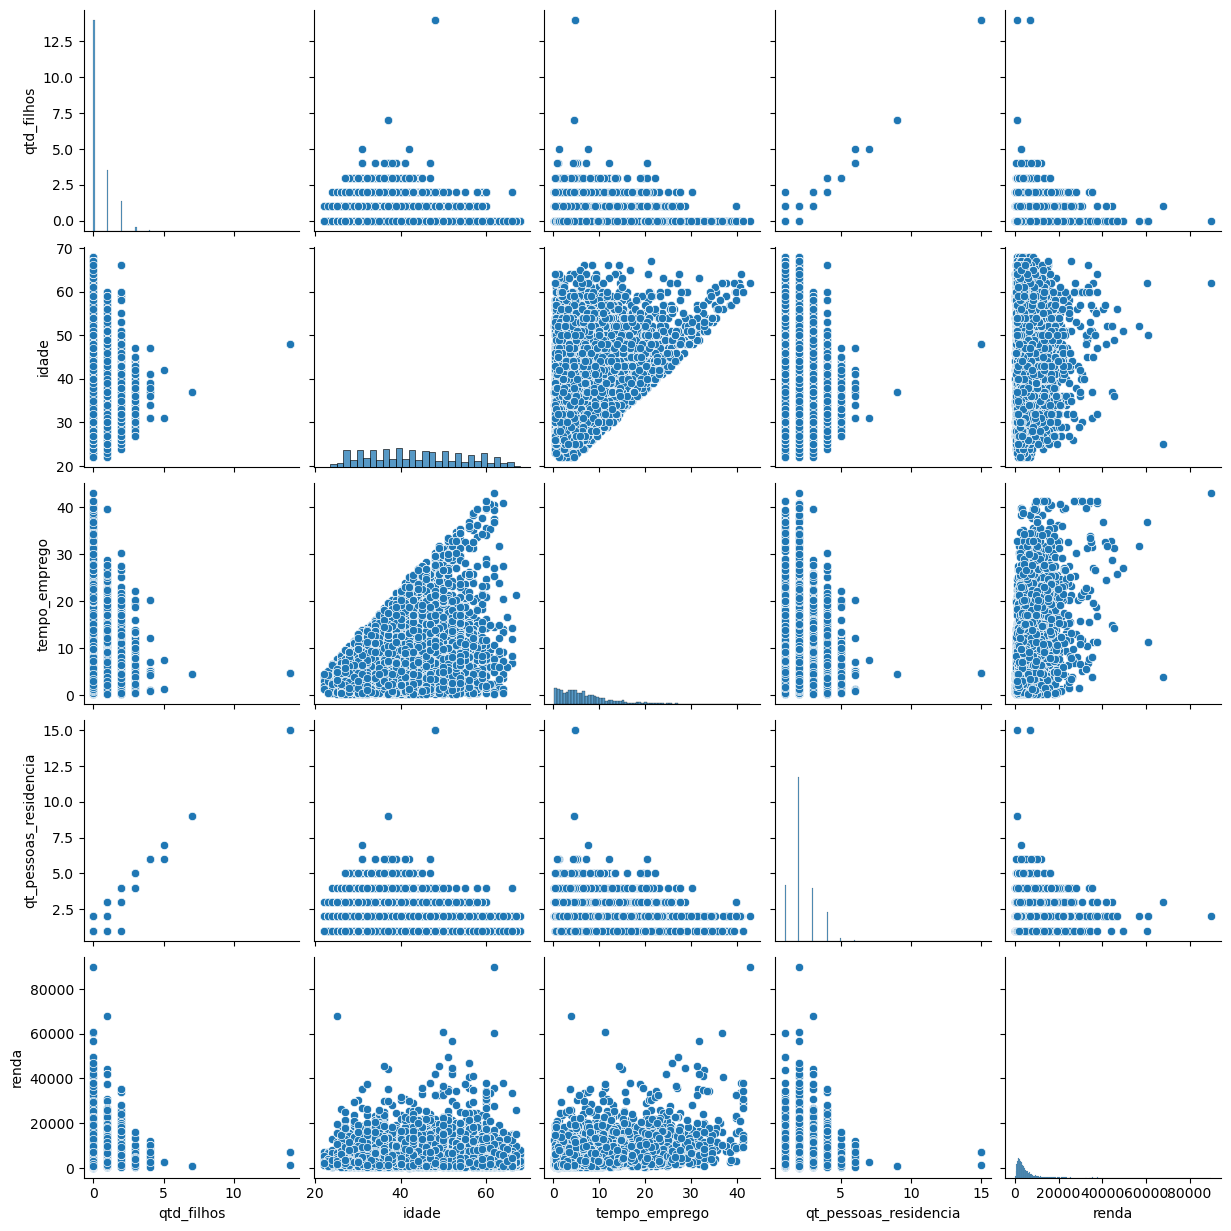

In [24]:
sns.pairplot(previsao_de_renda_qnt)

Analisando a matriz de dispersão é possível ver uma baixa correlação entre as variáveis. Além disso, parece haver outliers nas variáveis avaliadas.

In [10]:
# matriz de correlação 
previsao_de_renda_qnt.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


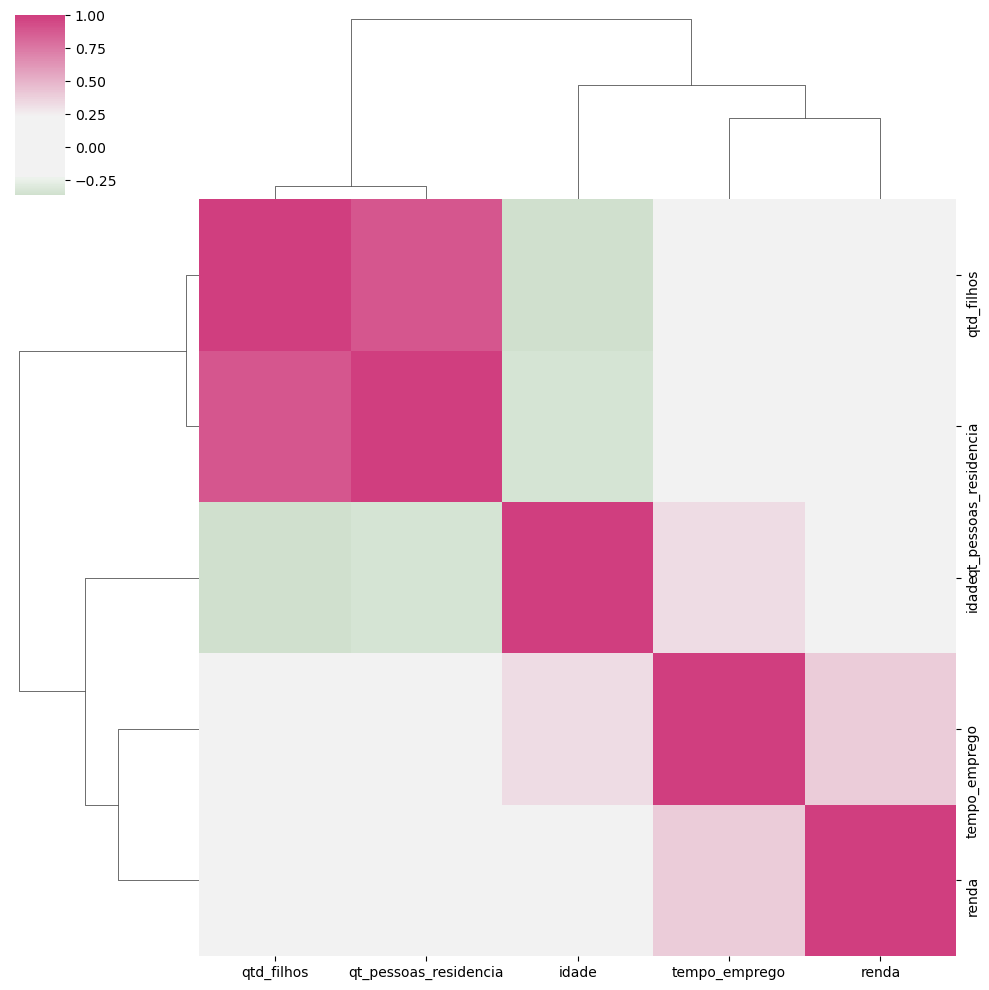

In [11]:
# visão gráfica da matriz de correlação

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao_de_renda_qnt.corr(), figsize=(10, 10), center = 0, cmap=cmap)

Tanto a matriz de correlação como a sua representação gráfica corroboram com a matriz de dispersão sobre a baixa correlação entre variáveis. 
- As variáveis ``renda`` e ``tempo de emprego`` apresentam correlação de aproximadamente 39%. 
- As variáveis ``quantidade de filhos`` e ``idade`` apresentam correlação negativa de aproximadamente 36%. 

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

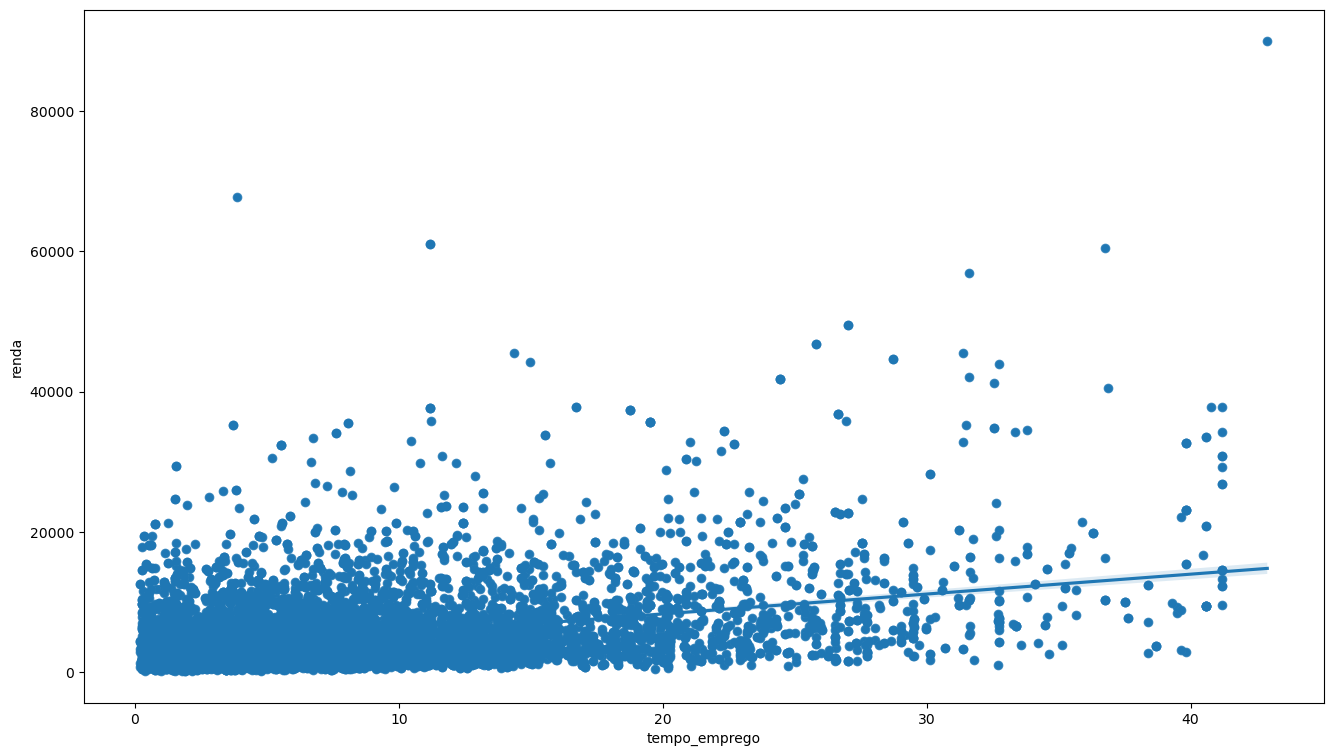

In [57]:
plt.figure(figsize=(16,9))

sns.scatterplot(data=previsao_de_renda,
                x= 'tempo_emprego',
                y= 'renda')

sns.regplot(x='tempo_emprego', y='renda', data=previsao_de_renda)

É possível ver a inclinação da linha de tendência, mesmo que a correlação seja baixa. 

<Axes: xlabel='idade', ylabel='renda'>

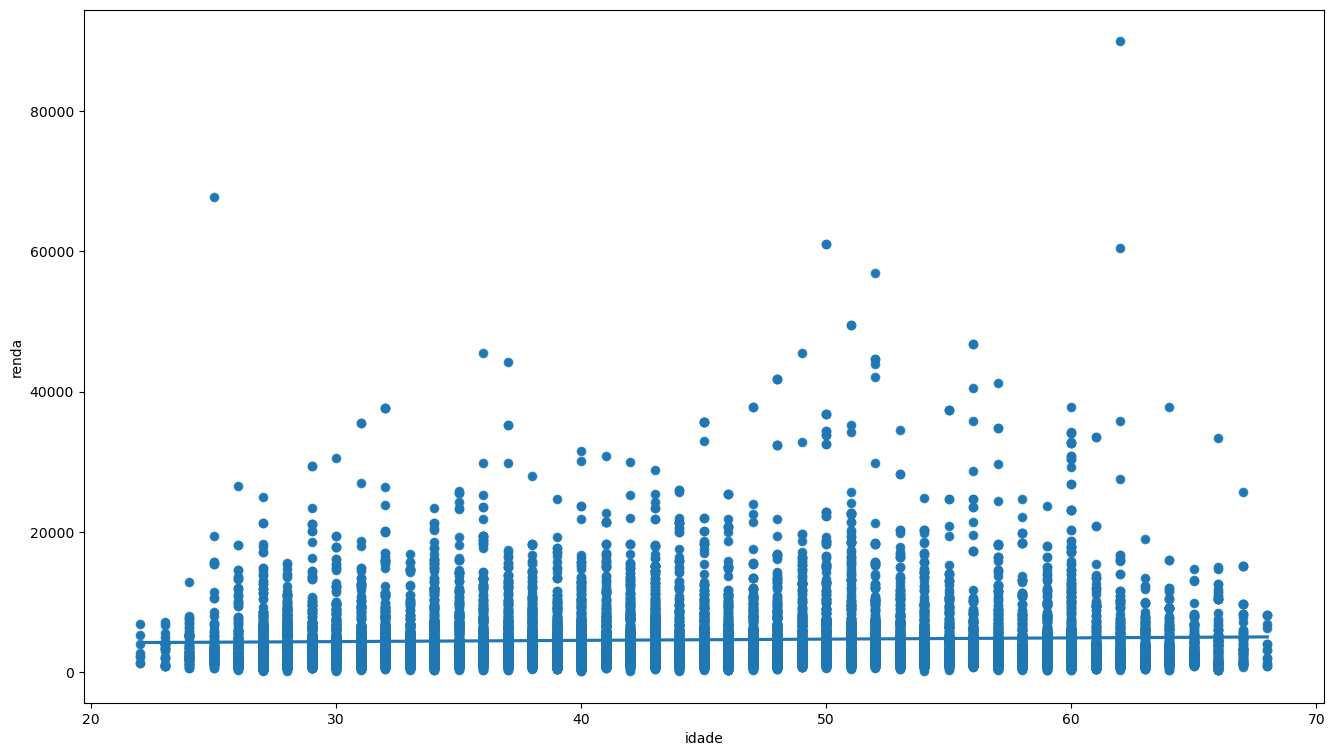

In [56]:
plt.figure(figsize=(16,9))

sns.scatterplot(data=previsao_de_renda,
                x= 'idade',
                y= 'renda')

sns.regplot(x='idade', y='renda', data=previsao_de_renda)

A inclinação da linha de tendência é imperceptível, corroborando a correlação muito baixa (aproximadamente 4%). 

3) Na su aopinião, há outliers na variável renda?

Sim. Nos gráficos de dispersão é possível observar alguns pontos que estão contrastando com os demais e longe da linha de tendência. Contudo, a frequência de outliers parece ser baixa.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [60]:
# acrescentar coluna no dataframe com o log de renda

previsao_de_renda_log = previsao_de_renda_qnt.copy()
previsao_de_renda_log['renda_log'] = np.log(previsao_de_renda_log['renda'])
previsao_de_renda_log

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
0,1,36,3.575342,3.0,3369.24,8.122442
1,0,42,0.860274,2.0,6096.14,8.715411
2,2,31,8.065753,4.0,5658.98,8.640999
3,0,50,1.208219,2.0,7246.69,8.888300
4,0,52,13.873973,2.0,4017.37,8.298383
...,...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29,7.084469
14996,1,30,12.079452,3.0,2519.18,7.831689
14997,0,40,2.161644,2.0,1586.85,7.369506
14998,0,47,3.295890,2.0,6975.39,8.850144


<Axes: xlabel='tempo_emprego', ylabel='renda_log'>

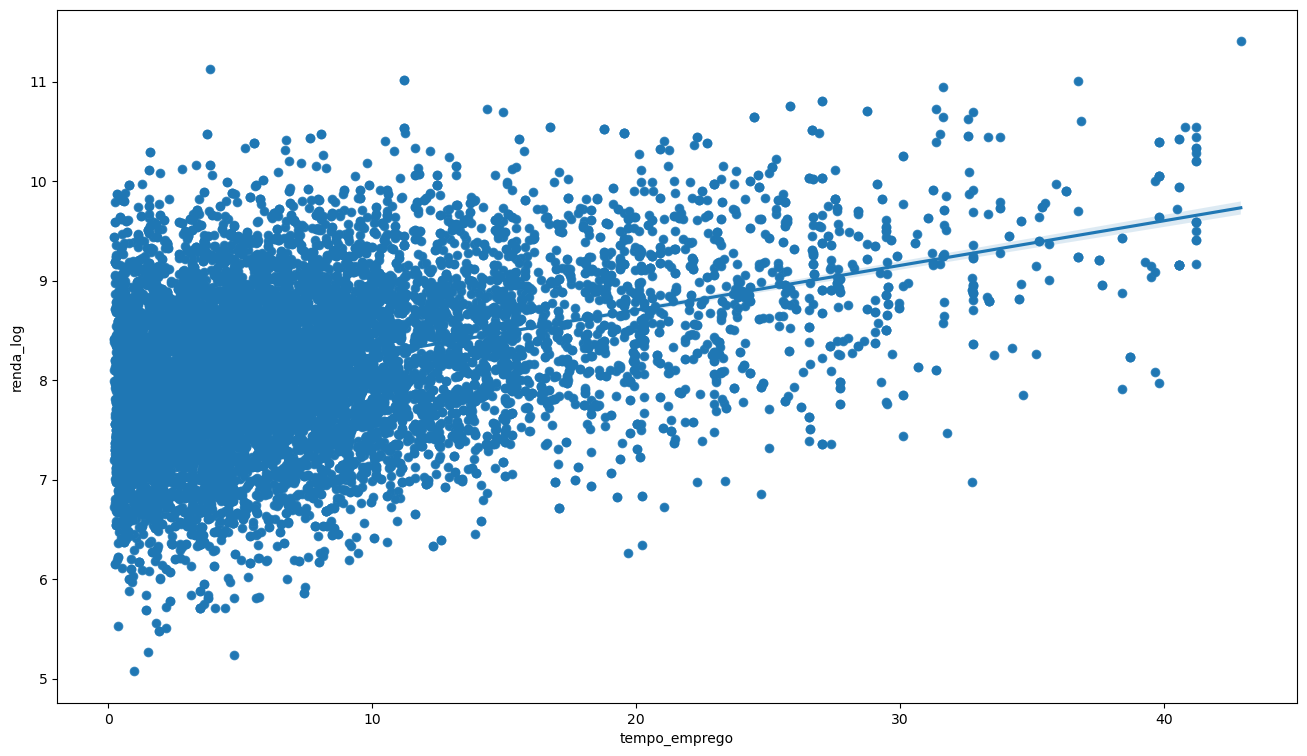

In [61]:
plt.figure(figsize=(16,9))

sns.scatterplot(data=previsao_de_renda_log,
                x= 'tempo_emprego',
                y= 'renda_log')

sns.regplot(x='tempo_emprego', y='renda_log', data=previsao_de_renda_log)

<Axes: xlabel='idade', ylabel='renda_log'>

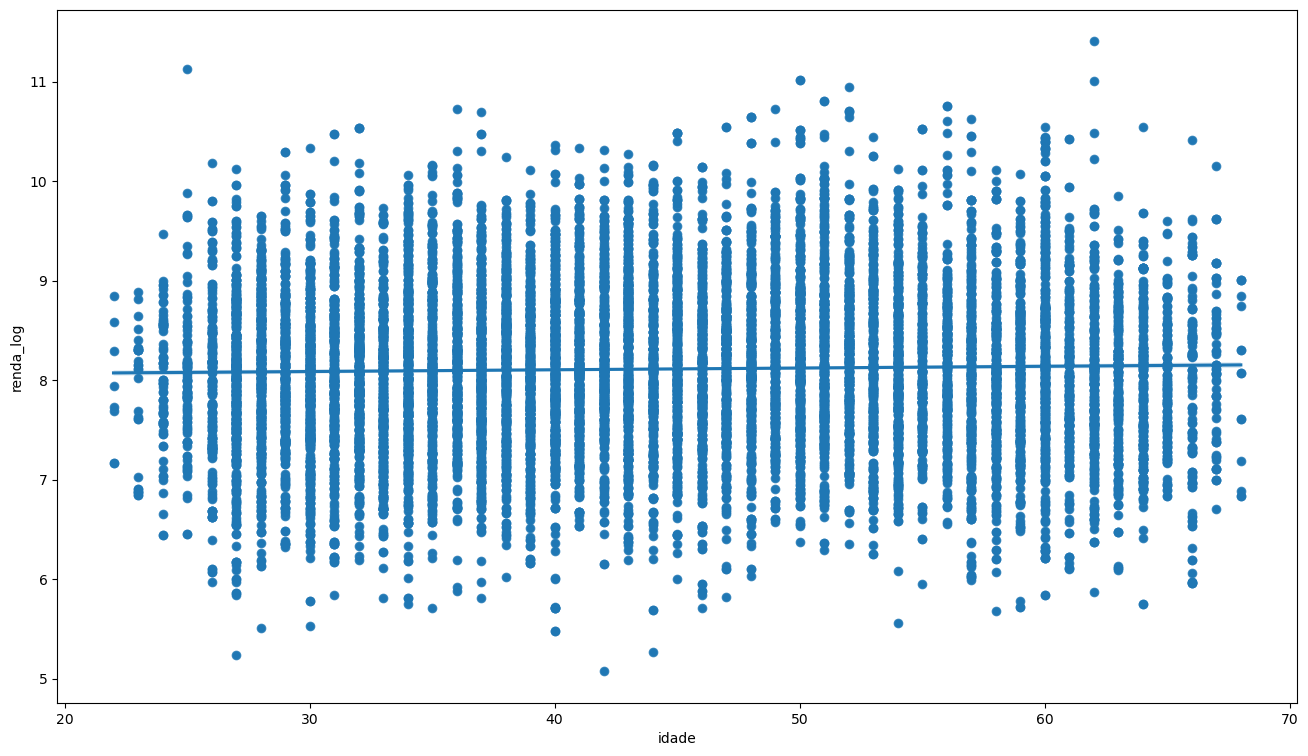

In [62]:
plt.figure(figsize=(16,9))

sns.scatterplot(data=previsao_de_renda_log,
                x= 'idade',
                y= 'renda_log')

sns.regplot(x='idade', y='renda_log', data=previsao_de_renda_log)

In [64]:
# matriz de correlação 
previsao_de_renda_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
renda_log,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

De maneira geral, as mudanças na matriz de correlação foram pequenas.
Em relação às duas variáveis observadas (``idade`` e ``tempo de emprego``), a correlação diminuiu bem pouco. Contudo, principalmente no gráfico do ``tempo de emprego`` os pontos estão mais concentrados e a linha de tendência parece estar com a inclinação maior, melhorando a análise.